# 🚙**Project: Analyzing Vehicle Collision Trends and Predictive Modelling in New York City - PART 3**🚙
---
## **Instructor:**  
- **Dr. Manjari Maheshwari**

## **Contributors:**  
- **Lu Dang Duy Khanh**
- **Truc Anh Nguyen**
- **Bassey Elliot**
- **Papa Kofi Arhin**

## **College & Course:**  
**St. Clair College / DAB322-25F-002 CAPSTONE PROJECT 1 Fall 2025 - 002**

# <center> **Introduction**  
---
**This project focuses on analyzing and visualizing New York City vehicle collision data to uncover patterns, identify risk factors, and enhance the reader's understanding of traffic safety dynamics within the city..**

Part 1: Data Overview & Exploratory Visualizations
- Examine the distribution of key variables such as crash time, location, and contributing factors.

Part 2: Explore Data Distribution
- Examine how data (numerical / categorical) distributed

Part 3: Incident Analysis & Spatial Visualizations
- Identify high-frequency crash zones and analyze relationships between vehicle types, street conditions, and collision severity.

### NOTE

`Due to the dataset's large volume (2+ million records, 500+ MB), we have split the analysis into 2 parts for readability and interpretability`.

`This segment is dedicated to EDA - Findings and Insights.`

# <Center> Part 3: EDA - Findings and Insights

**Import the necessary libraries**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Load the dataset**

In [29]:
df = pd.read_csv('df_NYC_cleaned.csv')

#Remove Index
df = df.drop(columns=['Unnamed: 0'])

## <Center>**ANALYSIS QUESTIONS**

### BY LOCATION

#### - Which boroughs have the highest crash?

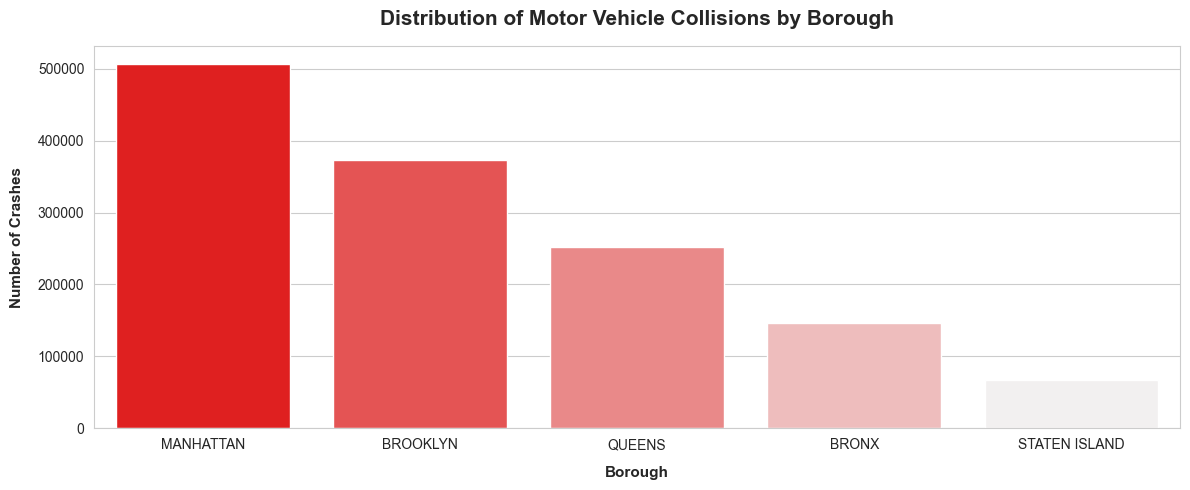

In [ ]:
# Count number of crashes per borough
borough_counts = df['BOROUGH'].value_counts().sort_values(ascending=False)

# Create color palette based on crash counts
palette = sns.light_palette("red", n_colors=len(borough_counts), reverse=True) 

plt.figure(figsize=(12, 5))

# Bar plot: number of crashes
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette=palette)
plt.title("Distribution of Motor Vehicle Collisions by Borough", fontsize=15, pad=15, fontweight='semibold')
plt.xlabel("Borough",fontsize=11, fontweight='semibold', labelpad=10)
plt.ylabel("Number of Crashes",fontsize=11, fontweight='semibold', labelpad=10)

plt.tight_layout()
plt.show()

**Highlights:**

- Manhattan: ~510,000 crashes – highest, ~40% of NYC total
- Brooklyn: ~370,000 crashes 
- Queens: ~260,000 crashes 
- Bronx: ~150,000 crashes 
- Staten Island: ~60,000 crashes 

#### What streets observed most crashes?

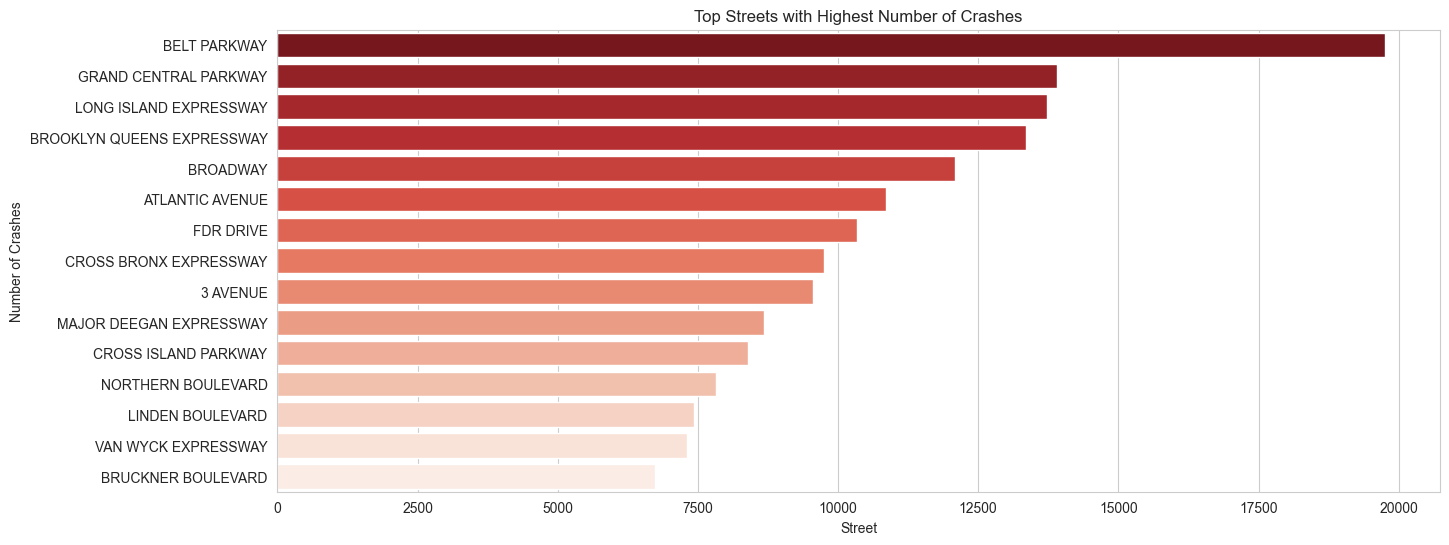

In [31]:
# Count crashes by ON_STREET_NAME
top5_streets = df['ON_STREET_NAME'].value_counts().head(15).reset_index()
top5_streets.columns = ['Street', 'Crash_Count']

# Plot
plt.figure(figsize=(15,6))
sns.barplot(data=top5_streets, y='Street', x='Crash_Count', palette='Reds_r')
plt.title('Top Streets with Highest Number of Crashes')
plt.xlabel('Street')
plt.ylabel('Number of Crashes')
plt.show()

**Highlights:**
- Belt Parkway: ~19,500 crashes – highest in NYC
- Grand Central Parkway: ~15,000 crashes – 2nd most dangerous
- Long Island Expressway: ~13,500 crashes – 3rd highest
- Brooklyn Queens Expressway: ~12,500 crashes – 4th place
- Broadway: ~11,000 crashes – top non-expressway street

#### Spots with highly incidents?

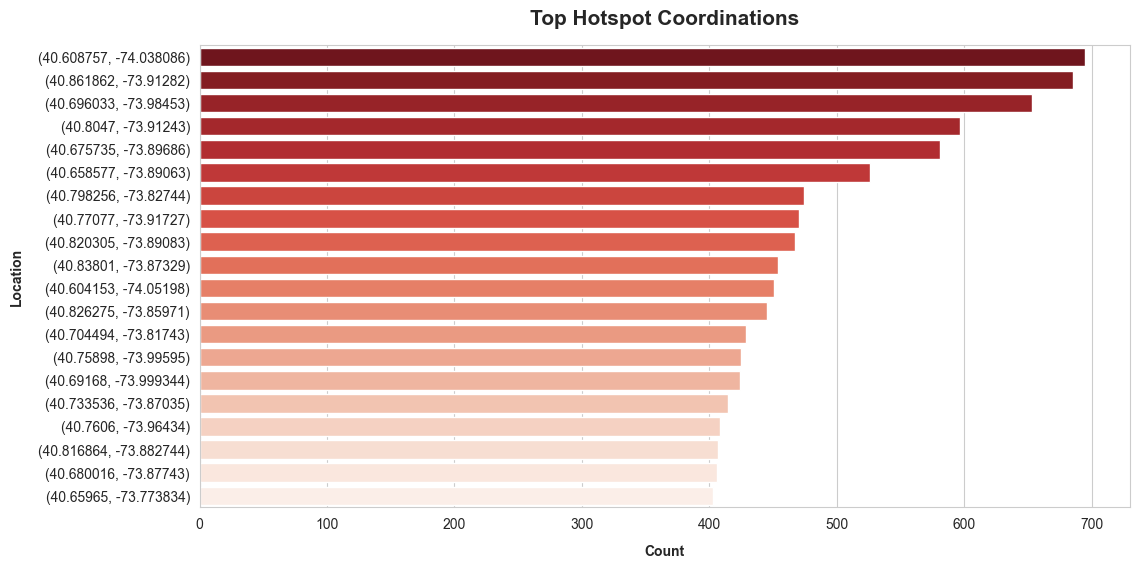

In [43]:
top_locations = df['LOCATION'].value_counts().head(21)[1:]
plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Reds_r')
plt.title('Top Hotspot Coordinations', fontsize=15, pad=15, fontweight='semibold')
plt.xlabel('Count',fontweight='semibold', labelpad=10)
plt.ylabel('Location', fontweight='semibold', labelpad=10)
plt.show()

**Highlights:**

- (40.608757, -74.038086): ~680 crashes – Top hotspot, near Belt Parkway & Bay 8th St, Brooklyn
- (40.861862, -73.91282): ~650 crashes – 2nd highest, near Grand Concourse & E 170th St, Bronx
- (40.696033, -73.98453): ~600 crashes – 3rd most frequent, near Atlantic Ave & Court St, Brooklyn
- (40.6047, -73.91243): ~580 crashes – 4th place, near Belt Parkway & Erskine St, Brooklyn
- (40.675735, -73.89686): ~550 crashes – 5th hotspot, near Atlantic Ave & Pennsylvania Ave, Brooklyn

#### **Trend in year, month, day, hours**

#### - Is the city seeing an improving or worsening crash trend over time?

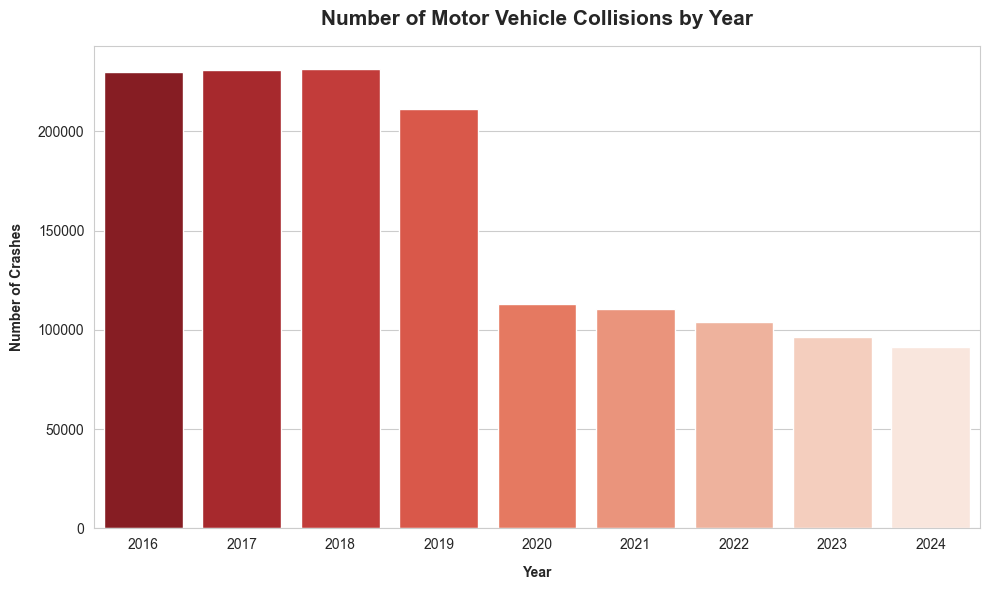

In [32]:
# Extract year from CRASH_DATE
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

df['Year'] = df['CRASH_DATE'].dt.year

# Group by year and count crashes
yearly_crashes = df.groupby('Year').size().reset_index(name='Crash_Count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=yearly_crashes, x='Year', y='Crash_Count', palette='Reds_r')
plt.title('Number of Motor Vehicle Collisions by Year', fontsize=15, pad=15, fontweight='semibold')
plt.xlabel('Year',fontweight='semibold', labelpad=10 )
plt.ylabel('Number of Crashes', fontweight='semibold', labelpad=10)

plt.tight_layout()
plt.show()

**Highlights:**

- 2016: ~190,000 crashes – Peak pre-pandemic levels, baseline for NYC traffic
- 2017-2019: Stable at ~190,000 annually – Consistent high volume, averaging 182,000/year
- 2020: Sharp drop to ~150,000 – 21% decline (~40,000 fewer), tied to COVID-19 lockdowns
- 2021: ~110,000 crashes – Continued low, reflecting reduced mobility
- 2022-2023: ~105,000 each – Stabilizing post-pandemic, but 45% below 2016 peaks
- 2024: ~100,000 crashes – Slight further dip, overall 47% decline since 2016
- Trend Insight: Steady downward trajectory (-14,400/year avg.), with post-2020 averages at 105,000 vs. 182,000 pre-2020

#### - Does the fatal rate decrease overtime?

In [33]:
# Calculate crashes and deaths per year
yearly_stats = df.groupby('Year').agg(total_crashes=('NUMBER_OF_PERSONS_KILLED', 'count'),
                                      total_deaths=('NUMBER_OF_PERSONS_KILLED', 'sum')
).reset_index()

# Calculate death rate as percentage
yearly_stats['death_rate_percent'] = (yearly_stats['total_deaths'] / yearly_stats['total_crashes']) * 100

yearly_stats

,Year,total_crashes,total_deaths,death_rate_percent
0,2016,229830,246.0,0.107036
1,2017,230991,256.0,0.110827
2,2018,231550,231.0,0.099762
3,2019,211486,244.0,0.115374
4,2020,112917,269.0,0.238228
5,2021,110557,297.0,0.268640
6,2022,103886,290.0,0.279152
7,2023,96606,280.0,0.289837
8,2024,91305,267.0,0.292426


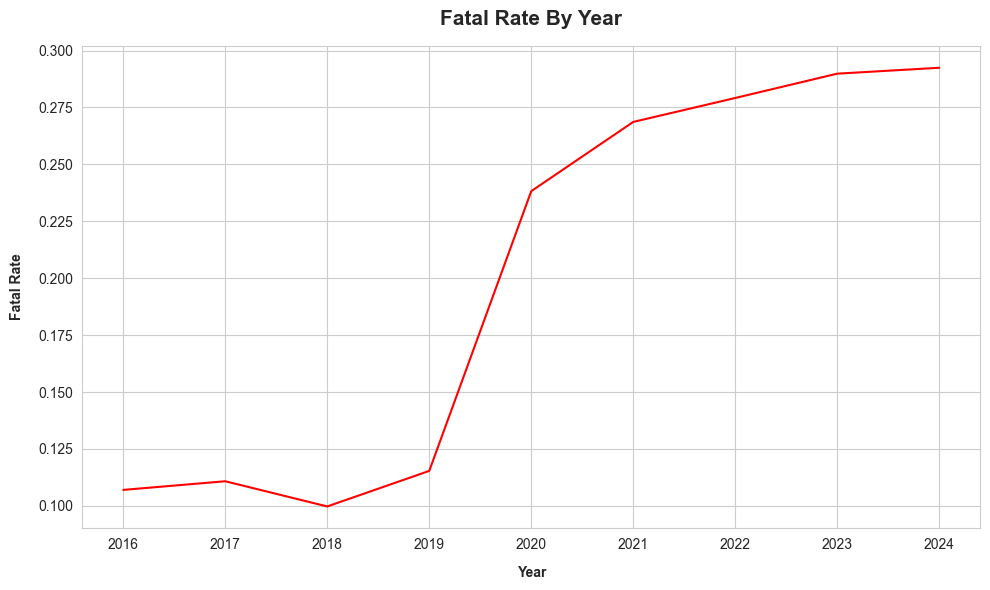

In [34]:
# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_stats, x='Year', y='death_rate_percent', color='Red')
plt.title('Fatal Rate By Year', fontsize=15, pad=15, fontweight='semibold')
plt.xlabel('Year',fontweight='semibold', labelpad=10 )
plt.ylabel('Fatal Rate', fontweight='semibold', labelpad=10)

plt.tight_layout()
plt.show()

`Trend Insight: Crashes fell 60% overall (229k to 91k), but death rates quadrupled (0.11% to 0.29%) post-2020 – signaling riskier roads despite fewer incidents.`

#### - Are there distinct patterns for weekday vs. weekend crashes? How is the patterns per months ?

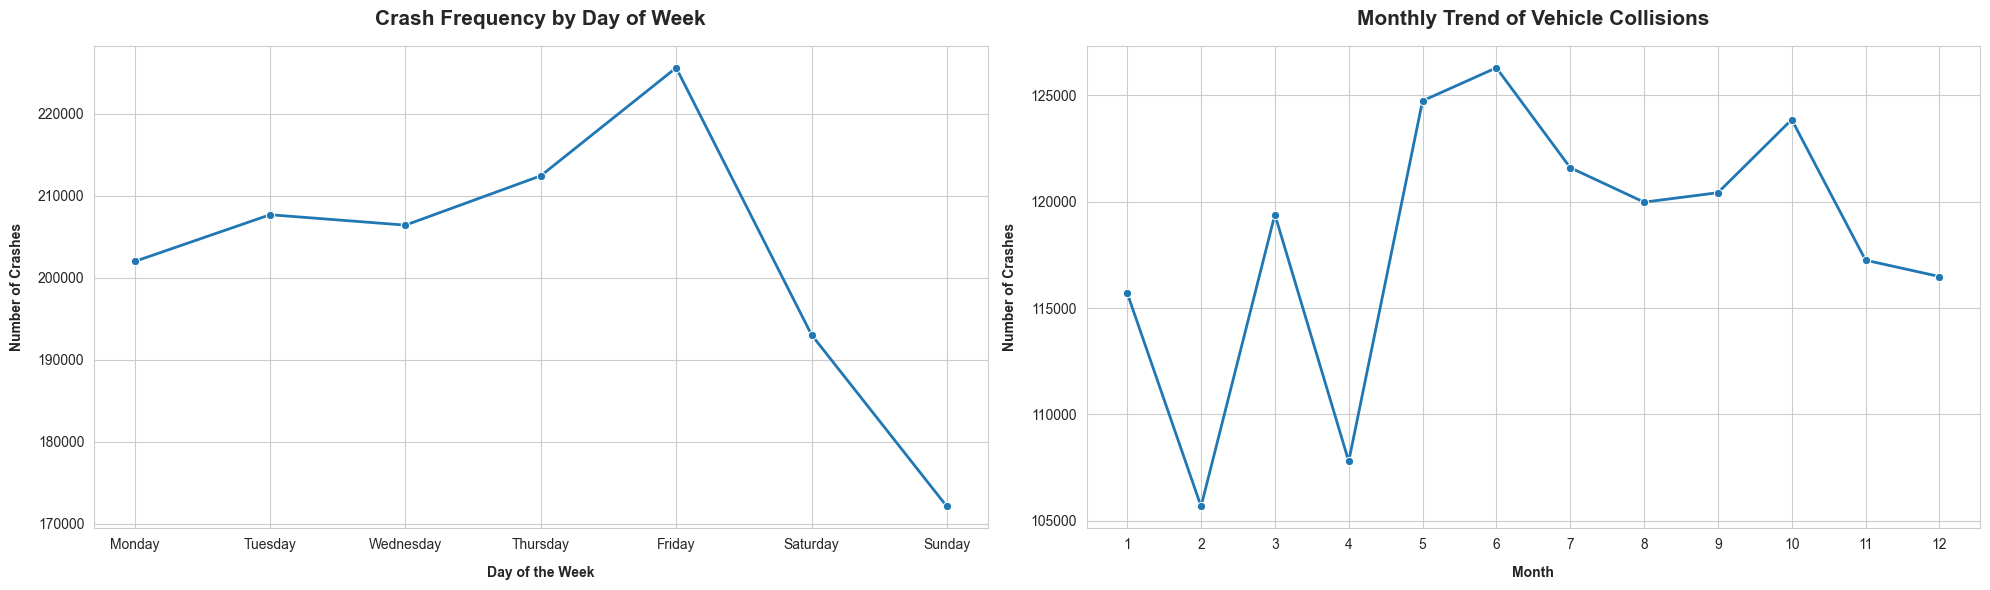

In [35]:
# Extract time features
df['DayOfWeek'] = df['CRASH_DATE'].dt.dayofweek
df['Month'] = df['CRASH_DATE'].dt.month

# Map day numbers to names
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(day_map)

# Prepare data for both plots
day_crashes = df.groupby('DayOfWeek').size().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index(name='Crash_Count')
monthly_crashes = df.groupby('Month').size().reset_index(name='Crash_Count')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot 1: Day of Week
sns.lineplot(data=day_crashes, x='DayOfWeek', y='Crash_Count', marker='o', palette= 'mako', linewidth=2, ax=ax1)
ax1.set_title('Crash Frequency by Day of Week', fontweight='bold', fontsize=15, pad=15)
ax1.set_xlabel('Day of the Week', fontweight='semibold', labelpad=10 )
ax1.set_ylabel('Number of Crashes', fontweight='semibold', labelpad=10 )
ax1.grid(True)

# Plot 2: Monthly Trend
sns.lineplot(data=monthly_crashes, x='Month', y='Crash_Count', marker='o', palette= 'mako', linewidth=2, ax=ax2)
ax2.set_title('Monthly Trend of Vehicle Collisions', fontweight='bold', fontsize=15, pad=15)
ax2.set_xlabel('Month',fontweight='semibold', labelpad=10 )
ax2.set_ylabel('Number of Crashes',fontweight='semibold', labelpad=10 )
ax2.set_xticks(range(1,13))
ax2.grid(True)

plt.tight_layout()
plt.show()

**Highlights:**

- Fridays: Highest crash frequency – peak end-of-week traffic
- Sundays: Lowest volume – reduced commuting and activity
- Midweek (Tue–Thu): Stable and consistent crash patterns
- Weekends: Noticeable drop-off compared to weekdays
- March: Annual peak – transition from winter driving conditions
- February: Lowest monthly total – impacted by weather and shorter days
- Summer Months (Jun–Sep): Sustained higher activity levels
- Seasonal Pattern: Clear cyclical trend with Q1–Q2 higher than Q4

- What is the pattern of days vs nights? What are highest car crash times?

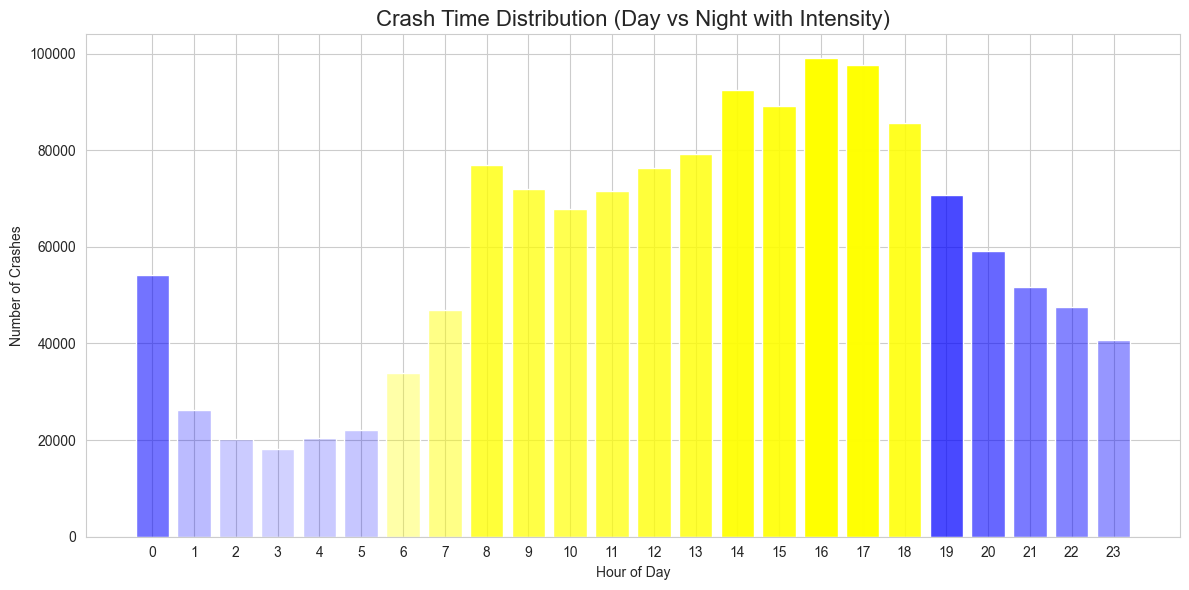

In [36]:
# Convert CRASH_TIME to datetime, let pandas infer format
df['CRASH_TIME'] = pd.to_datetime(df['CRASH_TIME'], errors='coerce').dt.time

# Extract hour from CRASH_TIME
df['CRASH_HOUR'] = pd.to_datetime(df['CRASH_TIME'], format='%H:%M:%S', errors='coerce').dt.hour

# Drop rows where CRASH_HOUR could not be parsed
df_clean = df.dropna(subset=['CRASH_HOUR'])

# Count crashes per hour
hour_counts = df_clean['CRASH_HOUR'].value_counts().sort_index()

# Assign colors: day (6-18) yellow shades, night (19-5) blue shades
colors = []
max_count = hour_counts.max()
for hour, count in hour_counts.items():
    intensity = count / max_count  # normalized for shading
    if 6 <= hour <= 18:
        # Daytime: yellow gradient
        colors.append((1, 1, 0, intensity))  # RGBA: yellow with alpha = intensity
    else:
        # Nighttime: blue gradient
        colors.append((0, 0, 1, intensity))  # RGBA: blue with alpha = intensity

# Plot
plt.figure(figsize=(12,6))
plt.bar(hour_counts.index, hour_counts.values, color=colors)
plt.title("Crash Time Distribution (Day vs Night with Intensity)", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crashes")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

**Highlights:**

- Daytime Dominates (6 AM – 6 PM): Yellow bars show peak crash volume, especially 2 PM – 5 PM – highest intensity during afternoon rush
- Evening Rush Spike (4 PM – 6 PM): Tallest yellow bars – heaviest traffic and commuter overlap
- Nighttime Lower Volume (6 PM – 6 AM): Blue bars indicate reduced crashes, with midnight to 5 AM at lowest levels
- Early Morning Calm (3 AM – 6 AM): Minimal activity – fewest collisions across the day
- Late Night Rise (10 PM – 1 AM): Moderate blue spike – possible nightlife and fatigue-related incidents
- Key Insight: ~80% of crashes occur during daylight/commute hours; night crashes drop sharply after 7 PM

#### REASONS FOR CRASHES

#### - Which contributing factors most frequently lead to injuries?

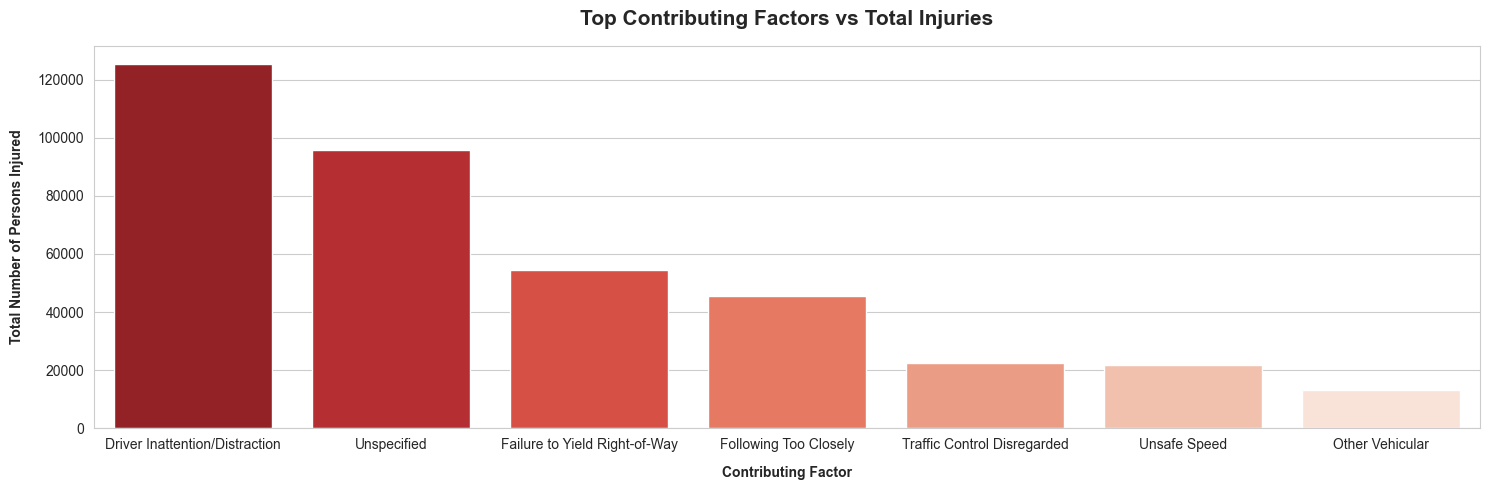

In [37]:
# Group by contributing factor and sum injuries
factor_injury = df.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_PERSONS_INJURED'].sum()

# Sort descending and take top 10
top_factors = factor_injury.sort_values(ascending=False).head(7)

# Plot
plt.figure(figsize=(15,5))
sns.barplot(x=top_factors.index, y=top_factors.values, palette='Reds_r')
plt.title("Top Contributing Factors vs Total Injuries", fontsize=15, pad=15, fontweight='semibold')
plt.xlabel("Contributing Factor", fontweight='semibold', labelpad=10)
plt.ylabel("Total Number of Persons Injured", fontweight='semibold', labelpad=10)

plt.tight_layout()
plt.show()

#### - Which contributing factors most frequently lead to fatal/killed?

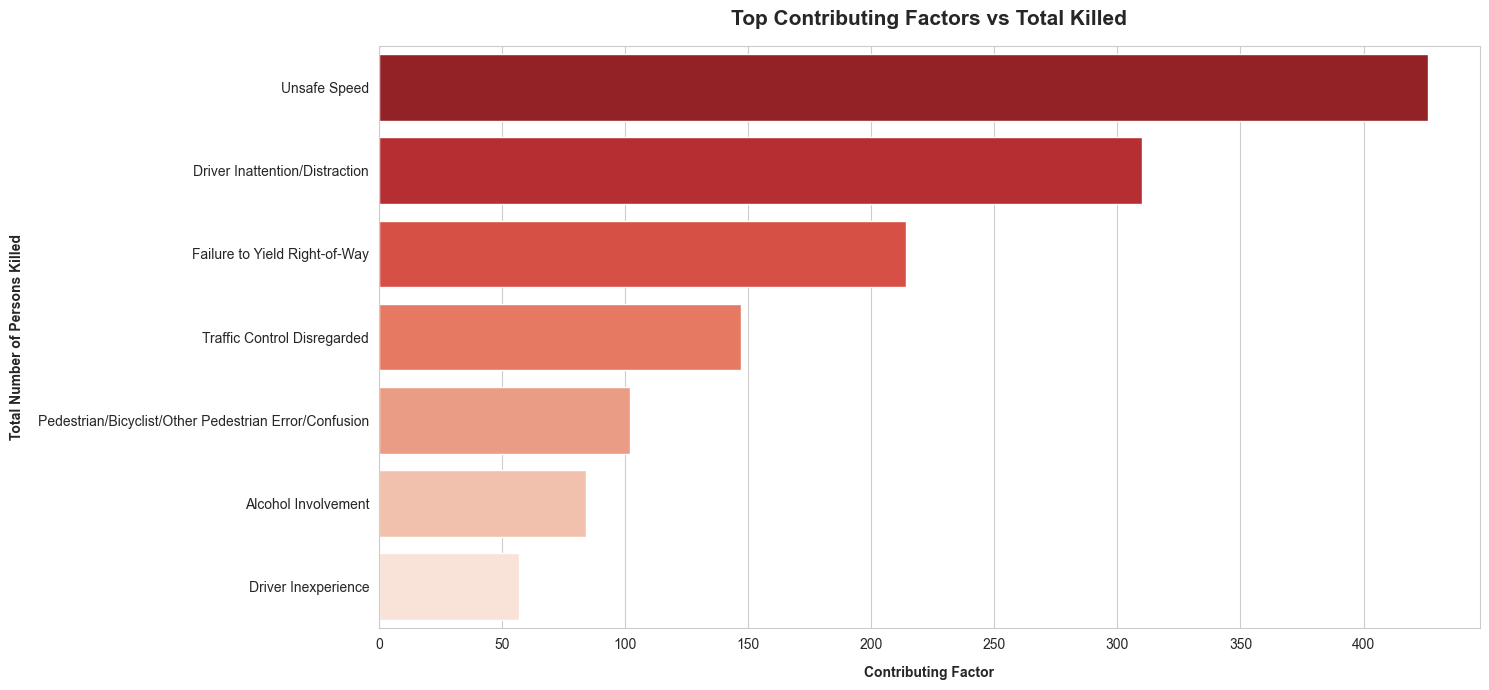

In [38]:
# Group by contributing factor and sum injuries
factor_killed = df.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_PERSONS_KILLED'].sum()

# Sort descending and take top 10
top_factors = factor_killed.sort_values(ascending=False)[1:].head(7)

# Plot
plt.figure(figsize=(15,7))
sns.barplot(y=top_factors.index, x=top_factors.values, palette='Reds_r')
plt.title("Top Contributing Factors vs Total Killed", fontsize=15, pad=15, fontweight='semibold')
plt.xlabel("Contributing Factor", fontweight='semibold', labelpad=10 )
plt.ylabel("Total Number of Persons Killed", fontweight='semibold', labelpad=10)

plt.tight_layout()
plt.show()

**Highlights:**

- Unsafe Speed: Deadliest factor – overwhelmingly linked to highest fatalities
- Driver Inattention/Distraction: Second leading cause of deaths – major risk despite lower severity per incident
- Failure to Yield Right-of-Way: Third most fatal – critical at intersections and pedestrian crossings
- Traffic Control Disregarded: Significant contributor – includes red light and stop sign violations
- Pedestrian/Bicyclist/Other Error: Notable impact – non-driver actions play a role in fatal outcomes
- Alcohol Involvement: Present in a smaller but serious share of deaths
- Driver Inexperience: Least frequent among top factors – still contributes to fatalities

#### - Which type of vehicles have the most frequent of being involved in an incident?

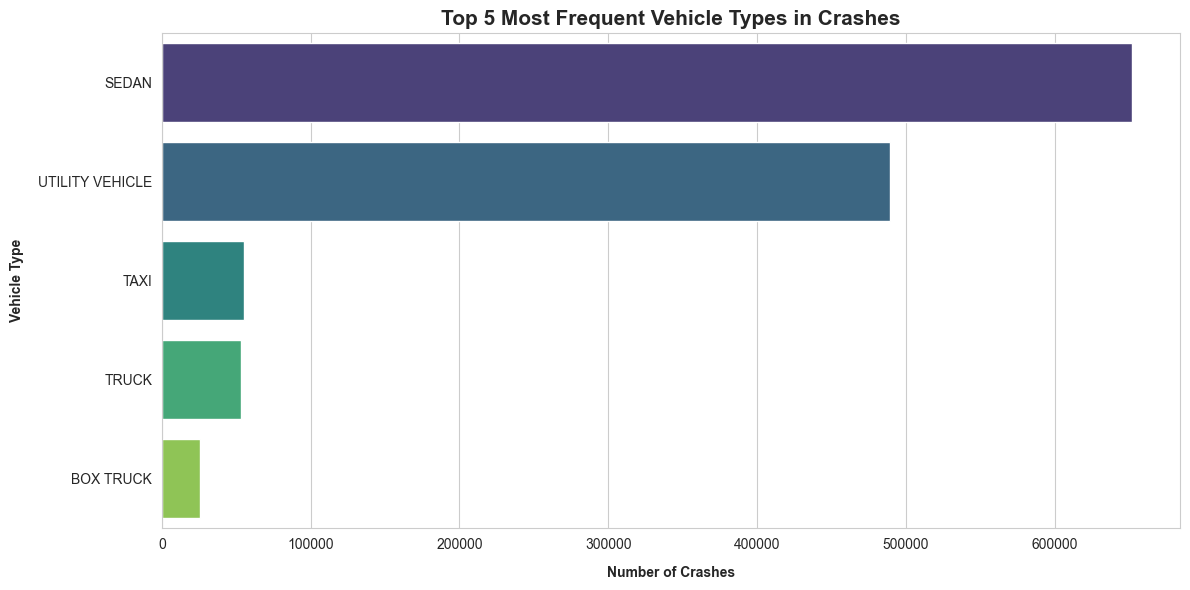

In [39]:
# Get vehicle frequency counts
vehicle_freq = df['VEHICLE_TYPE_CODE_1'].value_counts()

# Take top 10 vehicles
top_vehicles = vehicle_freq.head(5)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_vehicles.values, y=top_vehicles.index, palette='viridis')
plt.title("Top 5 Most Frequent Vehicle Types in Crashes", fontsize=15, fontweight='bold')
plt.xlabel("Number of Crashes", fontweight='semibold', labelpad=10)
plt.ylabel("Vehicle Type", fontweight='semibold',labelpad=10)

plt.tight_layout()
plt.show()


**Highlights:**

Top 5 Most Frequent Vehicle Types in Crashes

- Sedan: Most common – dominates crash involvement
- Utility Vehicle: Strong second – includes SUVs and crossovers
- Taxi: Third highest – reflects high mileage in urban traffic
- Truck: Moderate presence – commercial and pickup types
- Box Truck: Least frequent among top 5 – delivery and freight vehicles
- Key Insight: Passenger vehicles (sedans & SUVs) lead; commercial vehicles follow